# 1. Introdução

**Objetivo:** Detectar automaticamente regiões de água em imagens de satélite RGB, usando apenas regras clássicas de cor no espaço HSV.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from PIL import Image
from google.colab.patches import cv2_imshow

from pathlib import Path

In [ ]:
# Verifica se já foram baixadas as imagens do drive, baixando-as e descompactando se necessário
! [ ! -d "/content/satellite.jpg" ] && gdown -O /content/satellite.jpg "1ix8PRcDVpa5RUNAAelZyoc4yABaKc6Aw"


Downloading...
From: https://drive.google.com/uc?id=1ix8PRcDVpa5RUNAAelZyoc4yABaKc6Aw
To: /content/satellite.jpg
100% 201k/201k [00:00<00:00, 90.1MB/s]


#2. Estratégia

A água em imagens de satélite geralmente aparece com tons de **azul escuro** ou **verde escuro**, e **baixo brilho**.

Usamos a seguinte estratégia:
- Converter imagem RGB para HSV
- Aplicar limiar para tons de azul/verde escuro
- Refinar com morfologia (remoção de ruído)


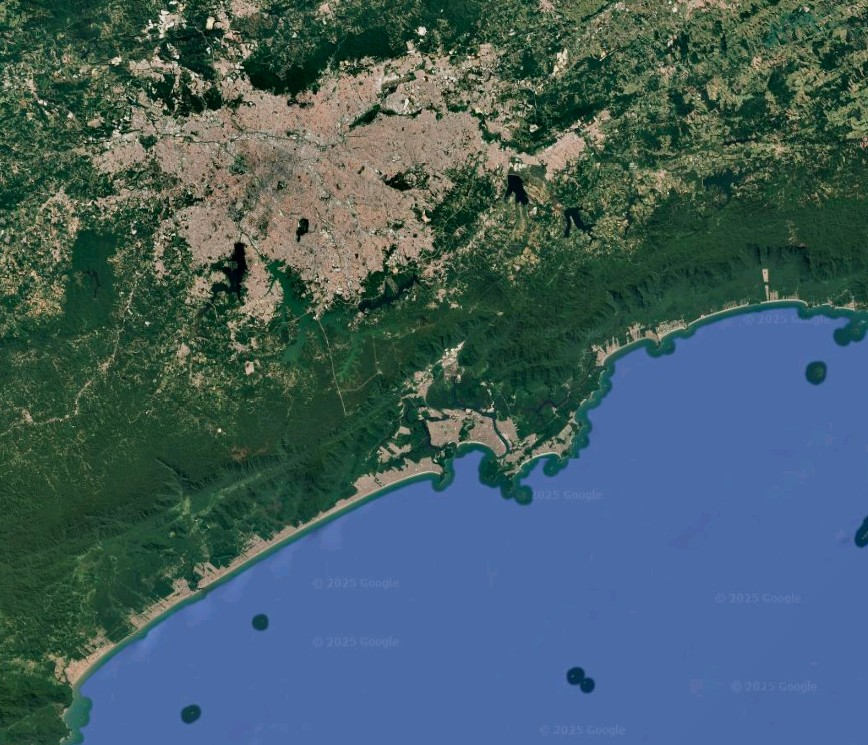

In [ ]:
img = cv2.imread("satellite.jpg")

cv2_imshow(img)

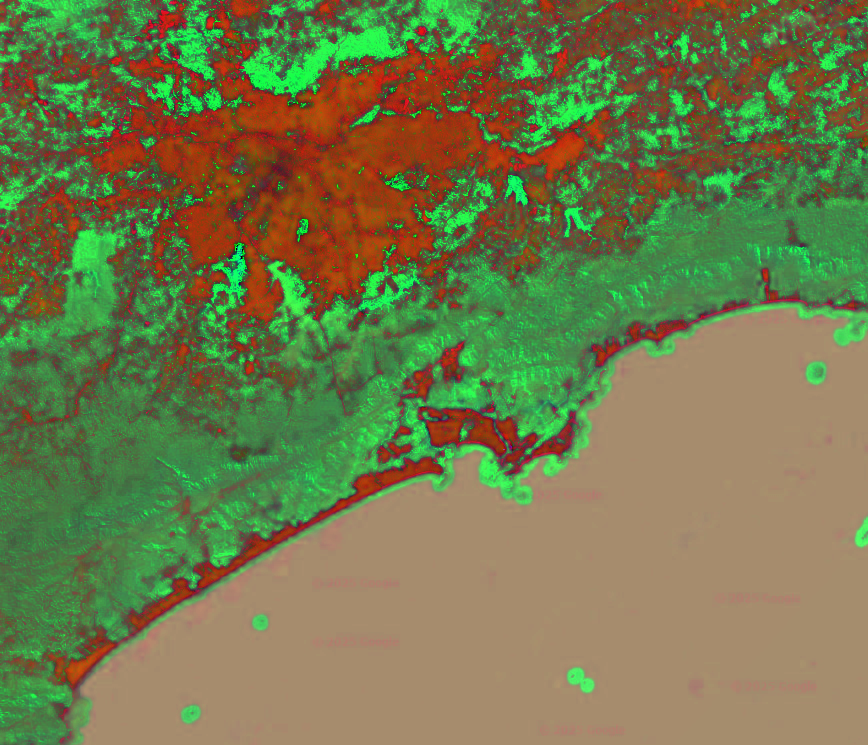

In [ ]:
# Converter para HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(hsv)

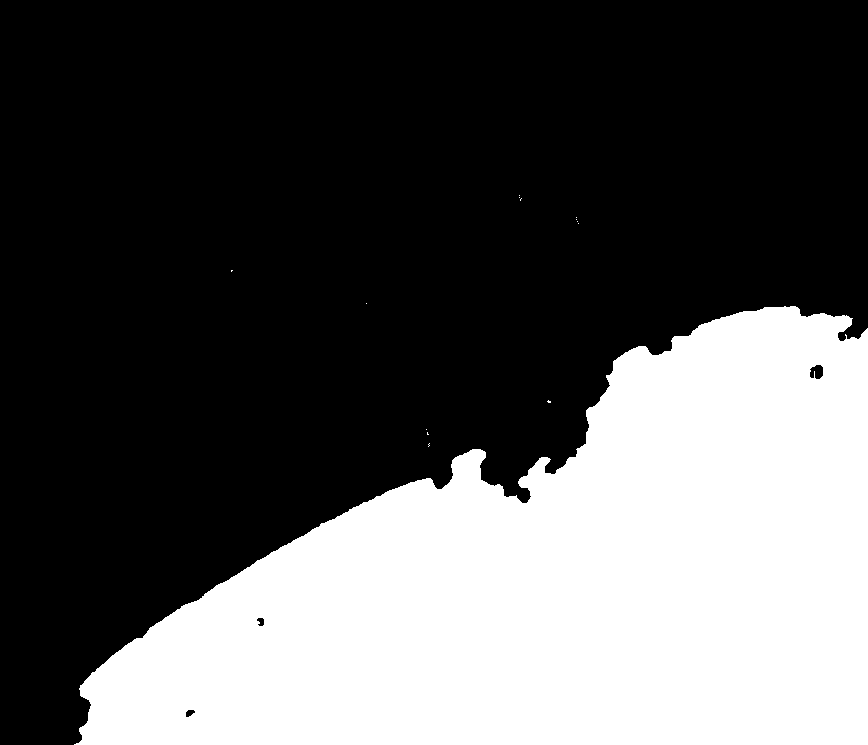

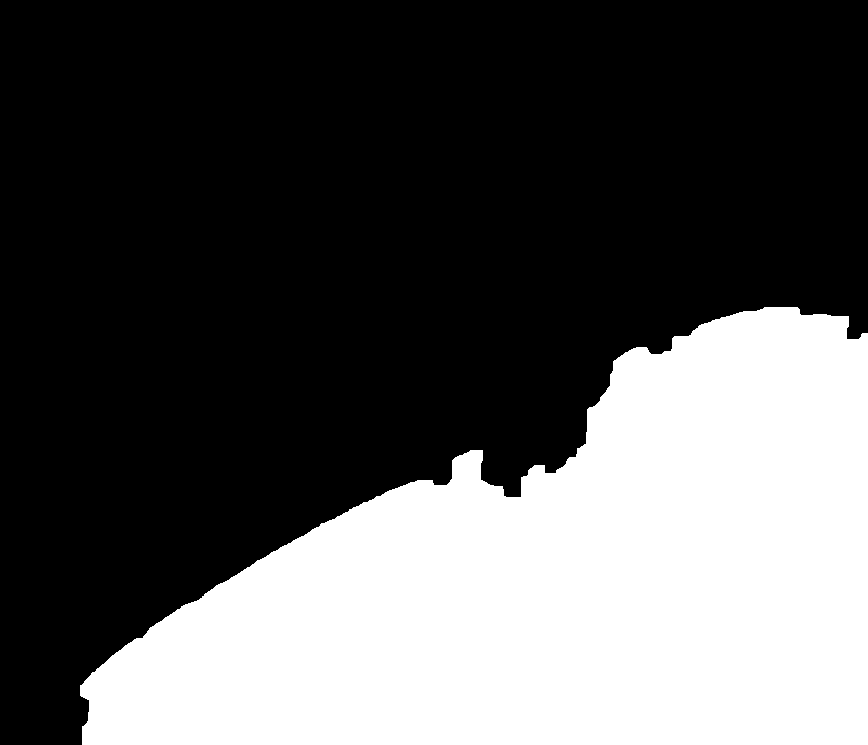

In [ ]:
# Definir intervalo para tons de azul escuro (água típica)
lower_blue = (95, 80, 30)
upper_blue = (115, 255, 255)

mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Remover ruídos com morfologia
kernel = np.ones((11,11), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

cv2_imshow(mask)
cv2_imshow(mask_clean)



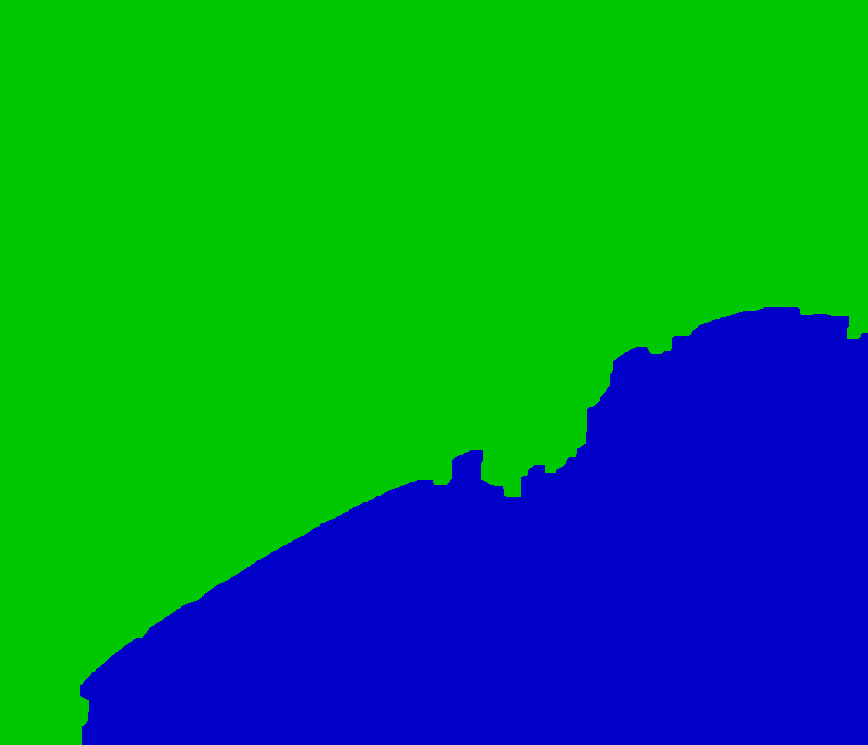

In [ ]:
# crie uma versao da imagem chamada overlay pintando a agua de azul e todo o resto

cv2_imshow(overlay)


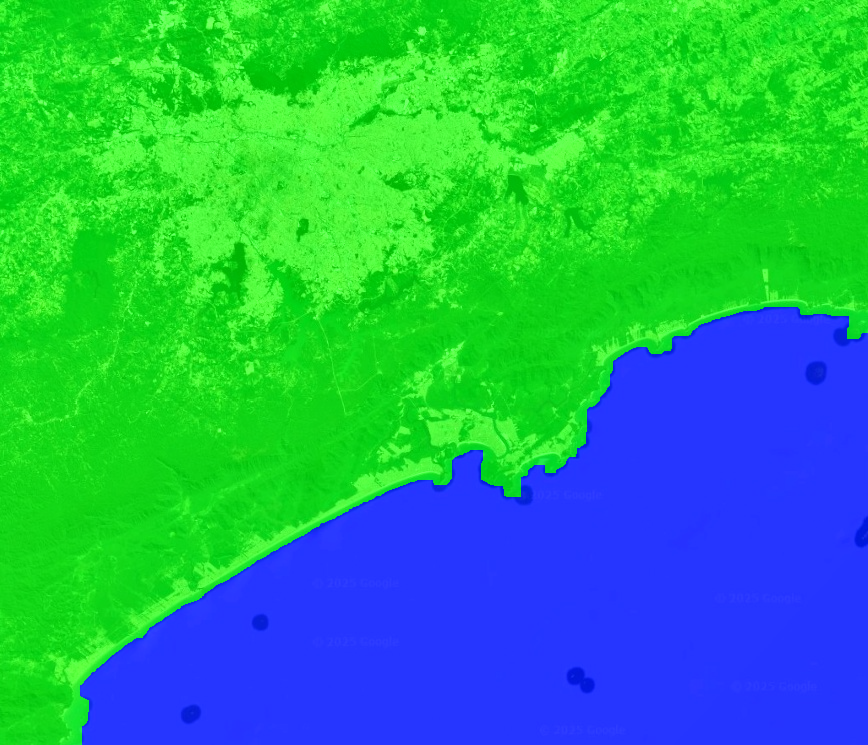

In [ ]:
final = cv2.addWeighted(img, 0.5, overlay, 0.9, 0)
cv2_imshow(final)

## Conclusão

- Conseguimos segmentar regiões de água com base em cor e brilho no espaço HSV.
- Essa abordagem é eficaz em cenários **controlados e bem iluminados**.
- Para casos mais complexos (águas turvas, sombras, nuvens), é necessário usar técnicas com aprendizado profundo.